In [1]:
import sys
from pathlib import Path

module_path = str(Path().resolve().parent / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

from curvature.tvg import *
from curvature.curvature_utils import *
from soap_parser.matrix import *
from soap_parser.tvg import draw_reeb_graph

import soap_parser.report_parser as rp
import networkx as nx

# TODO : fix random seed

### Scenario A : Data Mule

In [2]:
scenario_a = "Data Mule"

edges_a = [(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7), (8, 9), (8, 10),
(9, 11), (9, 12), (10, 13), (10, 14), (15, 16), (15, 17), (16, 18), (16, 19),
(17, 20), (17, 21), (22, 23), (22, 24), (23, 25), (23, 26), (24, 27), (24, 28)]
edges_b = edges_a + [(0, 1), (0, 8)]
edges_c = edges_a + [(0, 15), (0, 22)]

a_list = 2 * [edges_a] + 2 * [edges_b] + 2 * [edges_a] + 2 * [edges_c]

matrix_a = IntervalMatrix(29, 29, labels = [str(k) for k in range(29)])
start = 0
for e in 10 * a_list:
    for i, j in e:
        matrix_a[i, j] |= P.closed(start, start + 1)
    start += 1
network_a = TemporalNetwork(matrix_a)
# print(f"A : critical times = {network_a.get_critical_times()}")

# rg_a = network_a.get_reeb_graph()
# draw_reeb_graph(rg_a)

# print(f"{[network_a.get_node_label(k) for k in network_a.graph.nodes()]}")
print(f"Network A has {len(network_a.graph.nodes())} nodes.")

Network A has 29 nodes.


### Scenario B : Starlink

In [3]:
scenario_b = "Starlink [20 Satellites]"

filepath = "./scenario_b.csv"
nodes, edges = rp.contact_analysis_report_parser(filepath)
nodes, edges = rp.filter_contact_plan(nodes, edges, substring_exclusion_list=["Mars", "Moon"])

matrix_b = rp.contact_plan_to_matrix(nodes, edges)
matrix_b = matrix_b.get_submatrix(list(range(20)), list(range(20)))
network_b = TemporalNetwork(matrix_b)

# rg_b = network_b.get_reeb_graph()
# draw_reeb_graph(rg_b)

# print(f"{[network_b.get_node_label(k) for k in network_b.graph.nodes()]}")
print(f"Network B has {len(network_b.graph.nodes())} nodes.")

Network B has 20 nodes.


### Scenario C : LunaNet

In [4]:
scenario_c = "LunaNet"

filepath = "./scenario_c.csv"
nodes, edges = rp.contact_analysis_report_parser(filepath)
nodes, edges = rp.filter_contact_plan(nodes, edges, substring_exclusion_list=["Mars", "Moon"])

matrix_c = rp.contact_plan_to_matrix(nodes, edges)
network_c = TemporalNetwork(matrix_c)
# print(network_c)

# rg_c = network_c.get_reeb_graph()
# draw_reeb_graph(rg_c)

# print(f"{[network_c.get_node_label(k) for k in network_c.graph.nodes()]}")
print(f"Network C has {len(network_c.graph.nodes())} nodes.")

Network C has 15 nodes.


### True Reeb Graphs

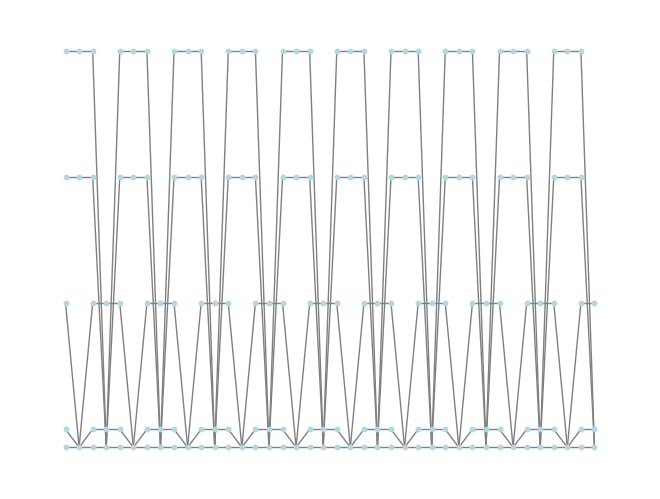

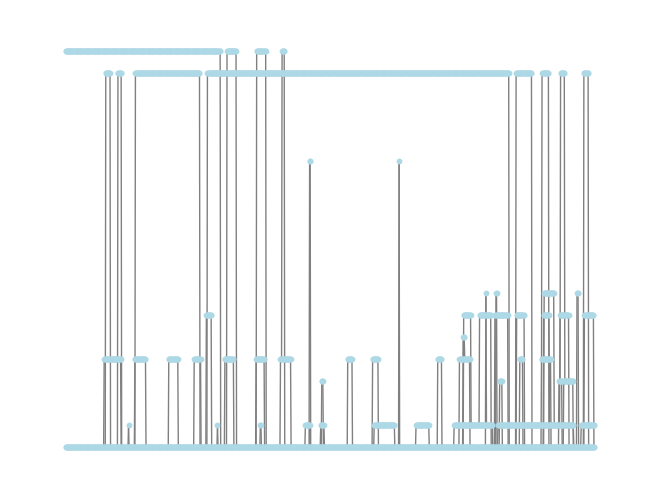

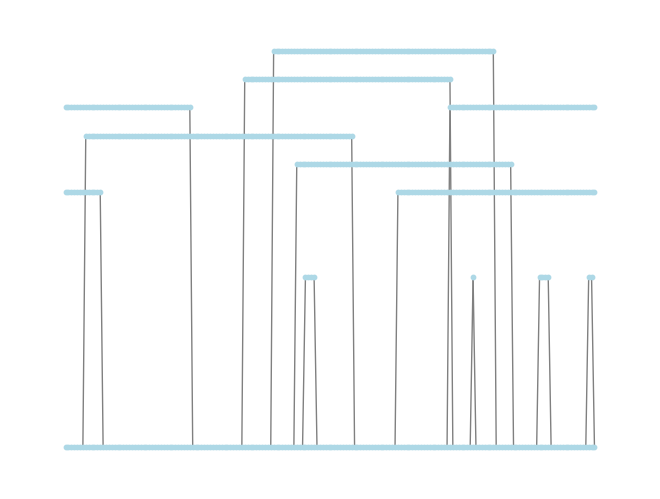

In [5]:
rg_a = network_a.get_reeb_graph()
draw_reeb_graph(rg_a)

rg_b = network_b.get_reeb_graph()
draw_reeb_graph(rg_b)

rg_c = network_c.get_reeb_graph()
draw_reeb_graph(rg_c)

### Evenly Sampled Reeb Graphs

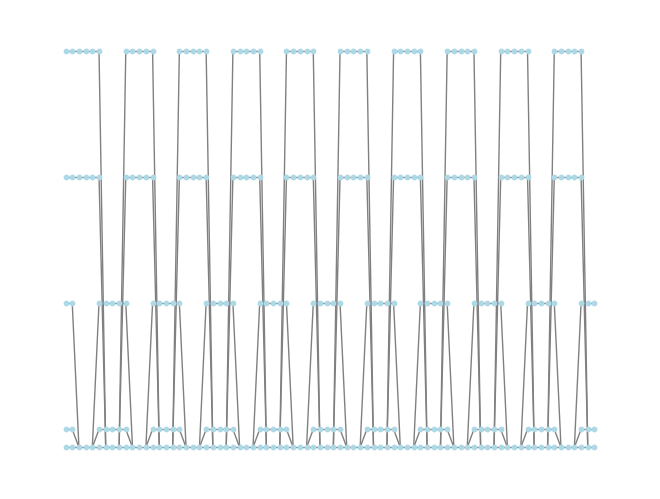

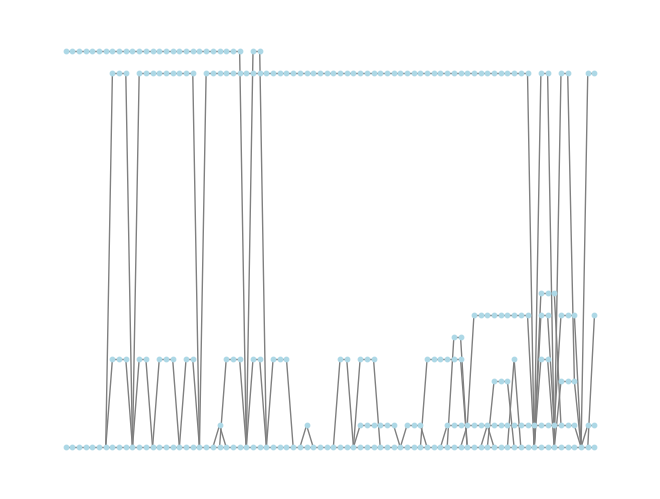

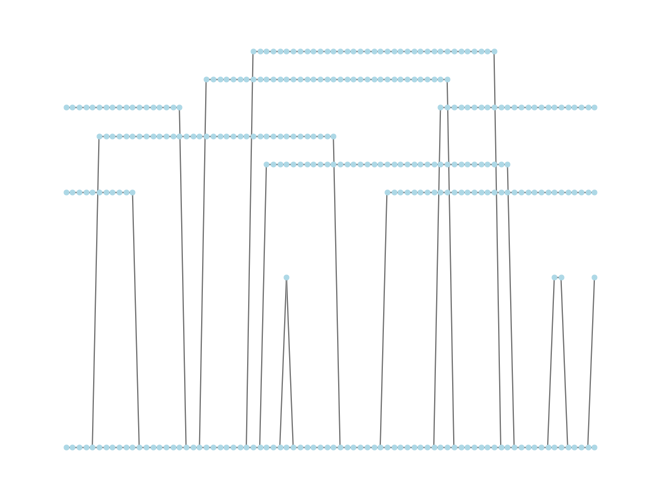

In [6]:
# scenario a : r = 1
sample_times_a = np.arange(0, 80, 1).tolist()
rg_a = network_a.get_reeb_graph(sample_times_a)
draw_reeb_graph(rg_a)

# scenario's b and c : r = 1080
start_time, end_time, r = 0, 86400, 1080
sample_times_b = sample_times_c = np.arange(start_time, end_time, r).tolist()

rg_b = network_b.get_reeb_graph(sample_times = sample_times_b)
draw_reeb_graph(rg_b)

rg_c = network_c.get_reeb_graph(sample_times = sample_times_c)
draw_reeb_graph(rg_c)

### Random Clusters

### Signatures : Toy Example

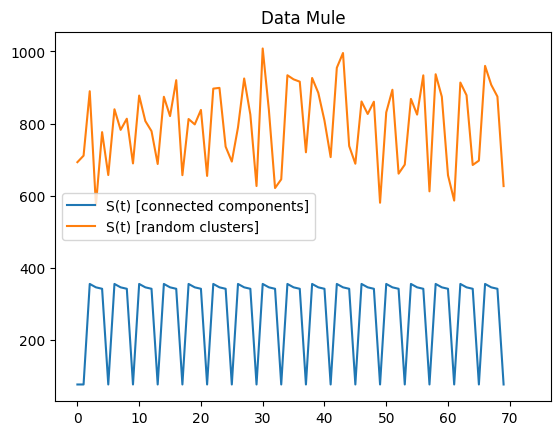

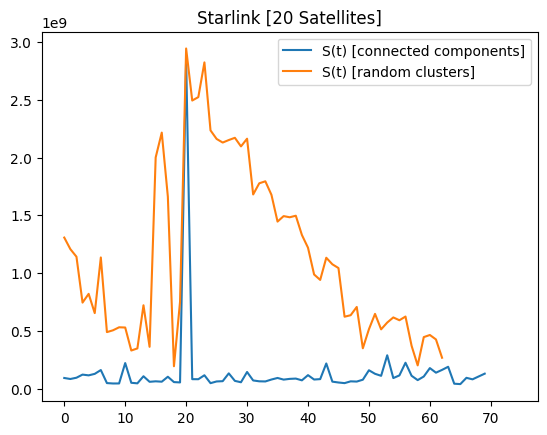

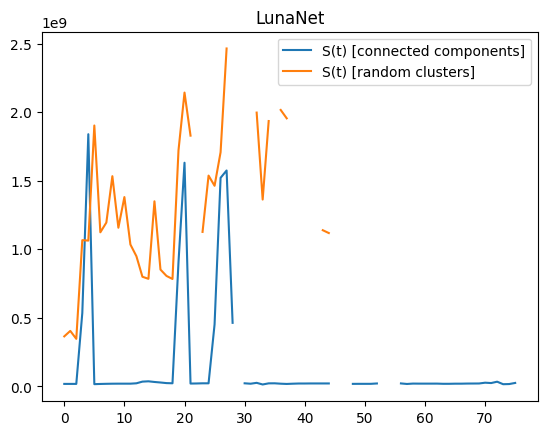

In [7]:
def plot_signatures(network, sample_times, r: float = 1, title = None) -> None:
    distance_matrices = network.calculate_distances(r = r)
    signatures_cc = calculate_signatures(
        distance_matrices,
        build_clusters(network, sample_times)
    )
    signatures_rc = calculate_signatures(
        distance_matrices,
        build_clusters(network, sample_times, randomize = True)
    )

    # for i, s in enumerate(signatures_cc):
    #     print(f"{i} : {len(str(int(s)))} {s = }")

    if title is not None:
        plt.title(title)
    plt.plot(signatures_cc, label="S(t) [connected components]")
    plt.plot(signatures_rc, label="S(t) [random clusters]")
    plt.legend()
    plt.show()
    return None

# scenario a
plot_signatures(network_a, sample_times_a, r = 1, title = scenario_a)

# scenario b
plot_signatures(network_b, sample_times_b, r = 1080, title = scenario_b)

# scenario c
plot_signatures(network_c, sample_times_c, r = 1080, title = scenario_c)

### Summary Graphs

Truncation T = 70 / 80


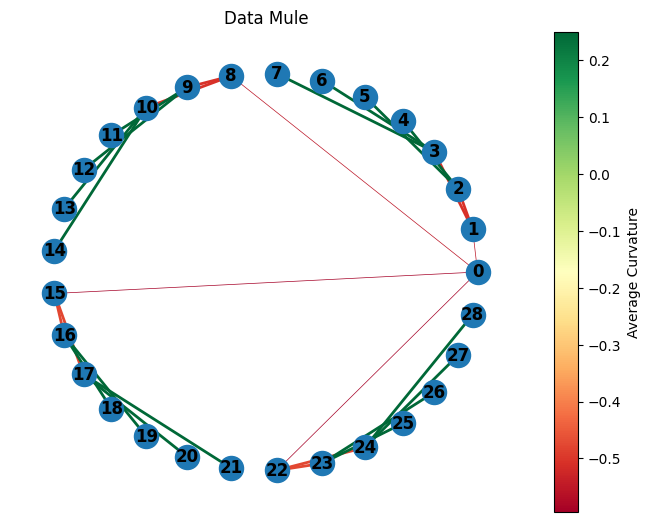

Truncation T = 60 / 80


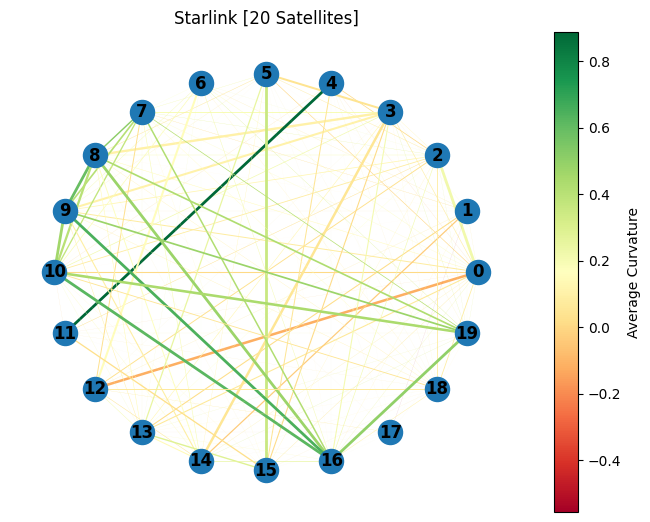

0:STARLINK-30858
1:STARLINK-30833
2:STARLINK-4206
3:STARLINK-31701
4:STARLINK-5012
5:STARLINK-3149
6:STARLINK-30700
7:STARLINK-31584
8:STARLINK-3342
9:STARLINK-5372
10:STARLINK-2651
11:STARLINK-1887
12:STARLINK-5952
13:STARLINK-5033
14:STARLINK-3982
15:STARLINK-30210
16:STARLINK-1730
17:STARLINK-11136 [DTC]
18:STARLINK-11182 [DTC]
19:STARLINK-4378
Truncation T = 20 / 80


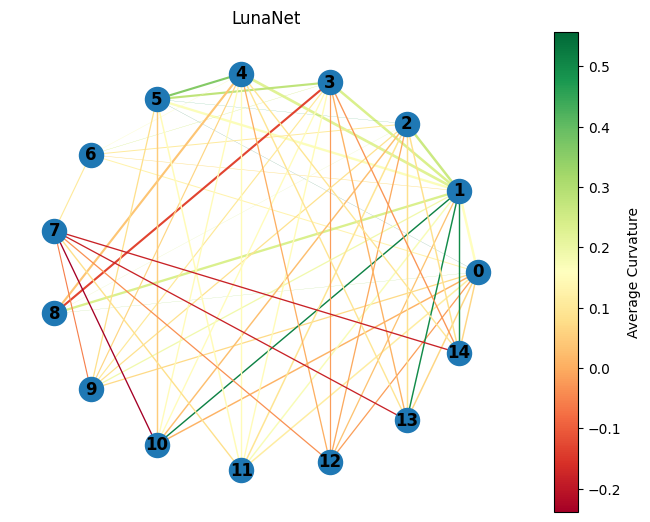

0:IOAGNorth1
1:Gateway
2:IOAGNorth2
3:IOAGSouth1
4:IOAGSouth2
5:LunarBase
6:LunarRoverFar
7:IOAGEquatorial
8:LunarRoverNear
9:DSN:Canberra
10:DSN:Goldstone
11:DSN:Madrid
12:LEGS:Dongara
13:LEGS:Wallops
14:LEGS:WhiteSands


In [8]:
# network_a.get_summary_graph()
K = 1
r = 1080

draw_summary_graph(network_a, title = scenario_a)
# print(f"{network_a:n}")

draw_summary_graph(network_b, title = scenario_b, K = K, r = r)
print(f"{network_b:n}")

draw_summary_graph(network_c, title = scenario_c, K = K, r = r)
print(f"{network_c:n}")



### Bottleneck Analysis

### Constant Cycle / Complete Graph Temporal Networks

Truncation T = 14 / 20


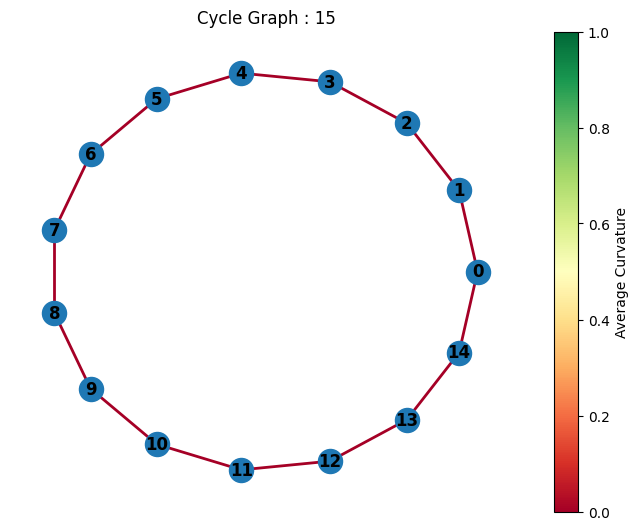

Truncation T = 20 / 20


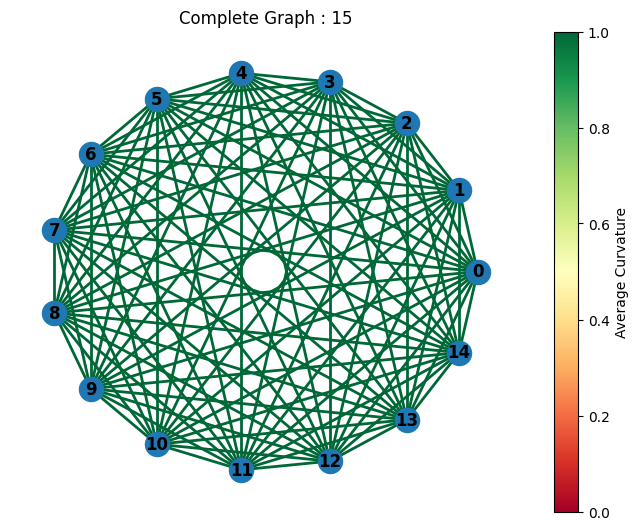

In [17]:
start, end = 0, 20

network_cg = build_cycle_tvg(n := 15, start = start, end = end)
draw_summary_graph(network_cg, title = f"Cycle Graph : {n}")

network_kg = build_complete_tvg(n := 15, start = start, end = end)
draw_summary_graph(network_kg, title = f"Complete Graph : {n}")


First `inf` found at 14 / 20


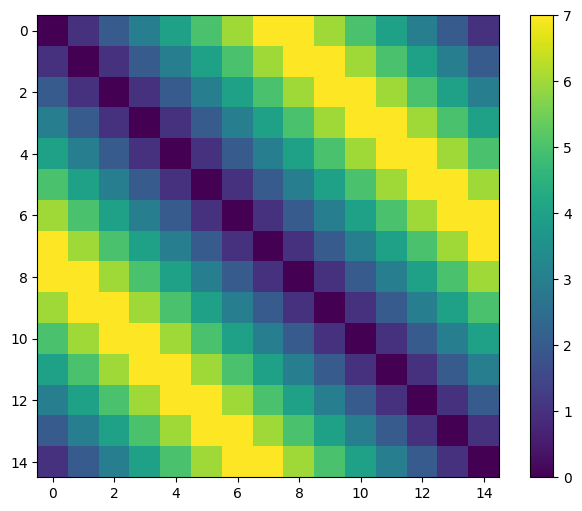

First `inf` found at 19 / 20


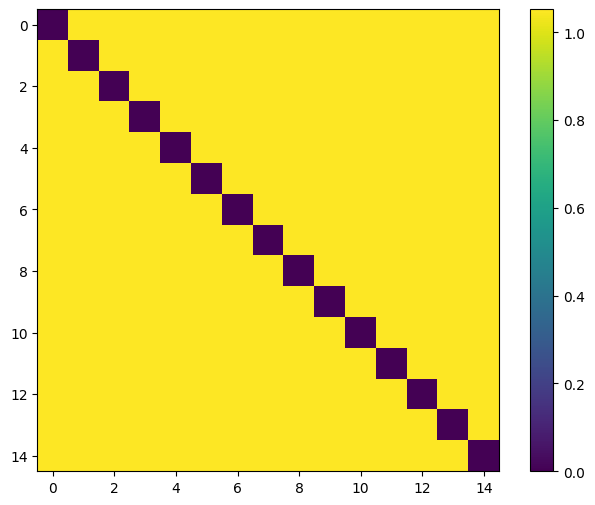

First `inf` found at 70 / 80


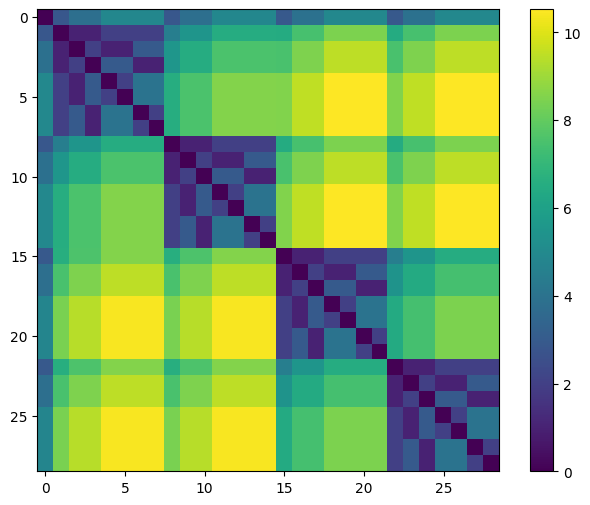

First `inf` found at 60 / 80


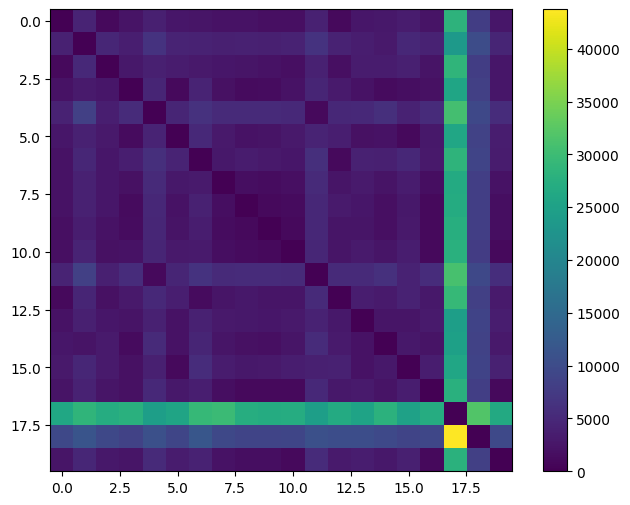

First `inf` found at 20 / 80


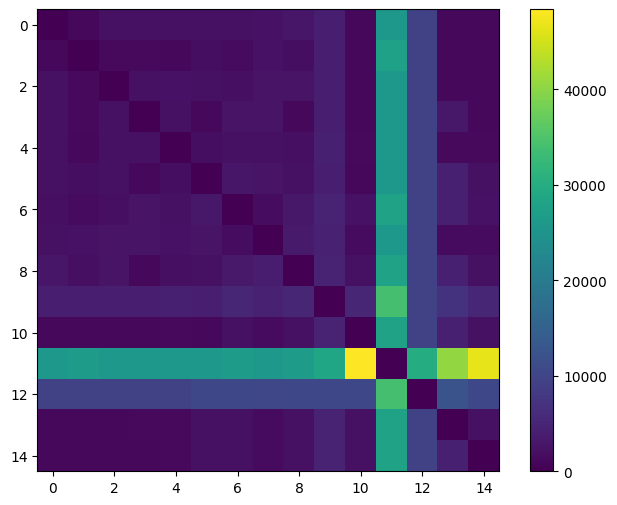

In [18]:
def plot_heatmaps(network: TVG, distance_matrices) -> None:

    matrix = network.calculate_averaged_distances(distance_matrices)

    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, cmap = 'viridis', interpolation = 'nearest')
    # plt.colorbar(label='Difference in Distances')
    plt.colorbar()
    # plt.title('Difference of Original vs. Curvature Low Pass Filter')
    # plt.xlabel('Column Index')
    # plt.ylabel('Row Index')
    plt.show()

    return None

# cycle graph
distance_matrices_cg = network_cg.calculate_distances(r = 1)
plot_heatmaps(network_cg, distance_matrices_cg)

# complete graph
distance_matrices_kg = network_kg.calculate_distances(r = 1)
plot_heatmaps(network_kg, distance_matrices_kg)

# scenario a
distance_matrices_a = network_a.calculate_distances(r = 1)
plot_heatmaps(network_a, distance_matrices_a)

# scenario b
distance_matrices_b = network_b.calculate_distances(r = 1080)
plot_heatmaps(network_b, distance_matrices_b)

# scenario c
distance_matrices_c = network_c.calculate_distances(r = 1080)
plot_heatmaps(network_c, distance_matrices_c)
